In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('./data/train.csv')

In [15]:
def calculate_outliers_percentage(df):
    outlier_percentages = {}

    # Iterate over each numeric column in the DataFrame
    for column in df.select_dtypes(include=['number']).columns:
        # Calculate Q1 and Q3, then IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers_count = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)].count()

        # Calculate the percentage of outliers
        total_count = df[column].count()  # Excludes NA/null values by default
        outlier_percentage = (outliers_count / total_count) * 100 if total_count > 0 else 0

        # Store the percentage in the dictionary
        outlier_percentages[column] = outlier_percentage

    # Sort the dictionary by its values in descending order
    sorted_outlier_percentages = dict(sorted(outlier_percentages.items(), key=lambda item: item[1], reverse=True))

    return sorted_outlier_percentages

In [16]:
df_copy = calculate_outliers_percentage(df)

In [17]:
df_copy

{'EnclosedPorch': 14.246575342465754,
 'BsmtFinSF2': 11.438356164383562,
 'OverallCond': 8.561643835616438,
 'ScreenPorch': 7.9452054794520555,
 'LotFrontage': 7.327227310574521,
 'MSSubClass': 7.054794520547945,
 'MasVnrArea': 6.6115702479338845,
 'BsmtHalfBath': 5.616438356164384,
 'OpenPorchSF': 5.273972602739726,
 'LotArea': 4.726027397260274,
 'KitchenAbvGr': 4.657534246575342,
 'TotalBsmtSF': 4.178082191780822,
 'SalePrice': 4.178082191780822,
 'MiscVal': 3.5616438356164384,
 'BedroomAbvGr': 2.3972602739726026,
 'WoodDeckSF': 2.191780821917808,
 'GrLivArea': 2.1232876712328768,
 'TotRmsAbvGrd': 2.054794520547945,
 'BsmtUnfSF': 1.9863013698630139,
 'LowQualFinSF': 1.7808219178082192,
 '3SsnPorch': 1.643835616438356,
 'GarageArea': 1.4383561643835616,
 '1stFlrSF': 1.36986301369863,
 'YearBuilt': 0.4794520547945206,
 'BsmtFinSF1': 0.4794520547945206,
 'PoolArea': 0.4794520547945206,
 'Fireplaces': 0.3424657534246575,
 'GarageCars': 0.3424657534246575,
 'OverallQual': 0.1369863013698

In [18]:
df['EnclosedPorch']

0         0
1         0
2         0
3       272
4         0
       ... 
1455      0
1456      0
1457      0
1458    112
1459      0
Name: EnclosedPorch, Length: 1460, dtype: int64

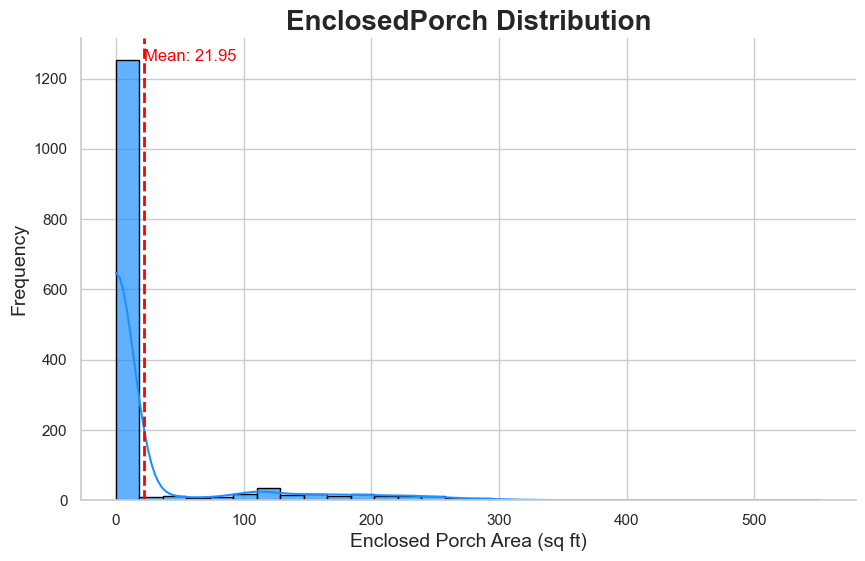

In [19]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the histogram for the 'EnclosedPorch' column
plt.figure(figsize=(10, 6))
sns.histplot(df['EnclosedPorch'], bins=30, kde=True, color="dodgerblue", edgecolor="black", alpha=0.7)

# Add enhancements
mean_value = df['EnclosedPorch'].mean()
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2)
plt.text(mean_value, plt.ylim()[1]*0.95, f'Mean: {mean_value:.2f}', color = 'red', fontsize=12, ha='left')

# Customize the plot further
plt.title('EnclosedPorch Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Enclosed Porch Area (sq ft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Remove top and right borders for a cleaner look
sns.despine()

# Show the plot
plt.show()

C:\Users\theal\AppData\Local\Temp\ipykernel_36240\4280739555.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='EnclosedPorchCategory', y='SalePrice', data=df_filtered,


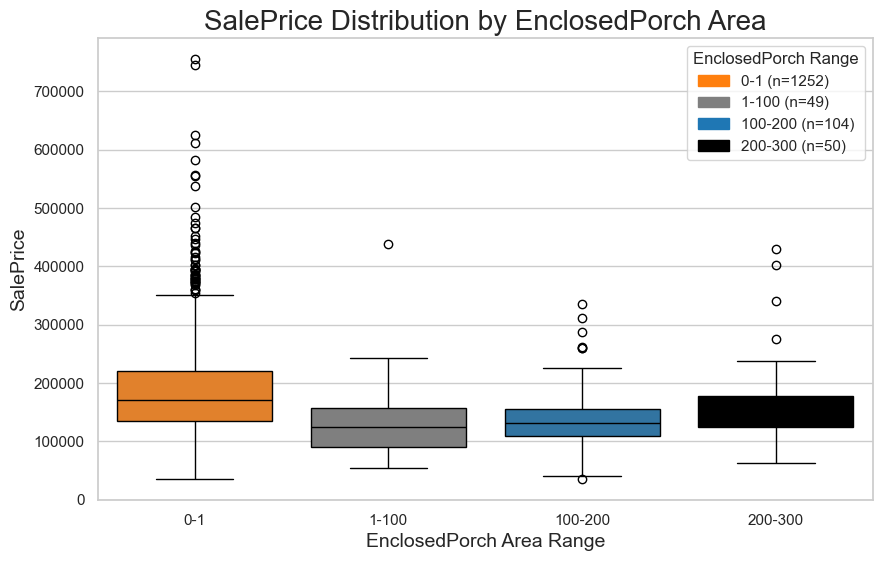

In [42]:
# Assuming df is your DataFrame and has columns 'EnclosedPorch' and 'SalePrice'

# Step 1: Categorize 'EnclosedPorch' and filter the DataFrame
# (Reusing your provided function and DataFrame preparation code)

# Step 2: Selecting representative colors from colormaps for the UIUC theme
# This step is adjusted to select solid colors for demonstration purposes
colors = ["#ff7f0e", "#7f7f7f", "#1f77b4", "#000000"]  # Example colors approximating UIUC theme

# Step 3: Create the boxplot
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='EnclosedPorchCategory', y='SalePrice', data=df_filtered,
                      order=['0-1', '1-100', '100-200', '200-300'], palette=colors)

# Step 4: Custom legend for category counts
# Calculating category counts for legend
category_counts = df_filtered['EnclosedPorchCategory'].value_counts().reindex(['0-1', '1-100', '100-200', '200-300']).fillna(0)

# Creating custom legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = [f'{cat} (n={int(count)})' for cat, count in category_counts.items()]
plt.legend(handles, labels, title='EnclosedPorch Range', loc='upper right')

plt.title('SalePrice Distribution by EnclosedPorch Area', fontsize=20)
plt.xlabel('EnclosedPorch Area Range', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)

# Show the plot
plt.show()
